In [ ]:
pip install prophet

     |████████████████████████████████| 65 kB 2.0 MB/s 
     |████████████████████████████████| 49 kB 4.1 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639995 sha256=65ae7dea61856d100d52e3d5c6d8fd2b68971d6ff81740d5cc66241663c38d58
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [63]:
df_zakat.total_zakat.mean()

437938.037037037

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
sns.set_theme()
import warnings
# from prophet port Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
warnings.filterwarnings('ignore')

lists_of_month = ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des']

In [4]:
df_zakat = pd.read_csv('zakat_full.csv')
df_zakat.head()

,ID,nama_lengkap,platform,category,tanggal,total_zakat,status,metode_pembayaran,user_category
0,2689,Dirga Imam Gozali Sumantri,Web,Zakat Penghasilan,2021-01-01 13:03:30,6000000.0,settlement,echannel,user
1,2690,Putu Berly Calvina Izumi,Web,Zakat Penghasilan,2021-01-04 00:55:12,100000.0,settlement,bank_transfer,user
2,2691,Pak Saeful Rokhman,WEB,Zakat Penghasilan,2021-01-04 08:43:51,300000.0,settlement,BCA - 1393004952,user
3,2692,Vinanda Langgeng Kencana,WEB,Zakat Penghasilan,2021-01-04 08:50:12,1000000.0,settlement,BCA - 1393040002,user
4,2693,Novias,WEB,Zakat Penghasilan,2021-01-04 09:41:49,55000.0,settlement,BCA - 1393040002,user


In [5]:
df_donasi = pd.read_csv('donasi_full.csv')
df_donasi.head()

,ID,nama_lengkap,platform,judul,tanggal,total_donasi,status,metode_pembayaran,user_category
0,26790,Alvandha Adindra,Web,PANTI ASUHAN YATIM DAN DHUAFA MALANG,2021-01-01 00:49:21,50000.0,settlement,bank_transfer,user
1,26791,Ruhendi Tirta Kusumah,Android,Sedekah Bantu Lansia Dhuafa Jalani Sisa Hidup ...,2021-01-01 04:49:33,100000.0,settlement,echannel,user
2,26792,Ibu Ari /JBB/Najumas/HS2/Koalum,PWA,PANTI ASUHAN YATIM DAN DHUAFA SUKASARI,2021-01-01 05:14:41,100000.0,settlement,bank_transfer,user
3,26793,Widiastutiningtyas,PWA,Masjid Untuk Santri Yatim Penghafal Alquran,2021-01-01 05:37:13,1000720.0,settlement,Transfer Bank Mandiri - 1320505050535,user
4,26794,abdul basit,Android,Lunasi Hutang Puasa dengan Membayar Fidyah,2021-01-01 05:42:34,5000.0,SUCCESS_COMPLETED,LINKAJA,user


In [6]:
df_zakat['tanggal'] = pd.to_datetime(df_zakat['tanggal'])
df_donasi['tanggal'] = pd.to_datetime(df_donasi['tanggal'])

In [ ]:
# gabung tanggal & donasi
donasi = df_donasi[['tanggal','total_donasi']].rename(columns={'total_donasi':'total'})
zakat = df_zakat[['tanggal','total_zakat']].rename(columns={'total_zakat':'total'})

In [ ]:
df_gabung = pd.concat([donasi,zakat], axis=0)
df_gabung

,tanggal,total
0,2021-01-01 00:49:21,50000.0
1,2021-01-01 04:49:33,100000.0
2,2021-01-01 05:14:41,100000.0
3,2021-01-01 05:37:13,1000720.0
4,2021-01-01 05:42:34,5000.0
...,...,...
670,2021-12-03 12:58:54,250000.0
671,2021-12-03 13:53:49,213000.0
672,2021-12-04 14:04:49,100000.0
673,2021-12-05 09:24:00,500000.0


In [ ]:
gabung_per_hari = df_gabung.groupby(pd.Grouper(key='tanggal', freq='D'))['total'].count().reset_index().rename(
    columns={'total':'Jumlah'}
)
gabung_per_hari.head()

,tanggal,Jumlah
0,2021-01-01,50
1,2021-01-02,27
2,2021-01-03,30
3,2021-01-04,42
4,2021-01-05,45


In [ ]:
for i in range(12):
  print(df_donasi[df_donasi.tanggal.dt.month == i]['tanggal'].max())

## Forecast banyaknya transaksi (donasi + zakat)

In [ ]:
gabung_per_hari.shape

(340, 2)

Text(0.5, 1.0, 'Jumlah transaksi sepanjang 2021')

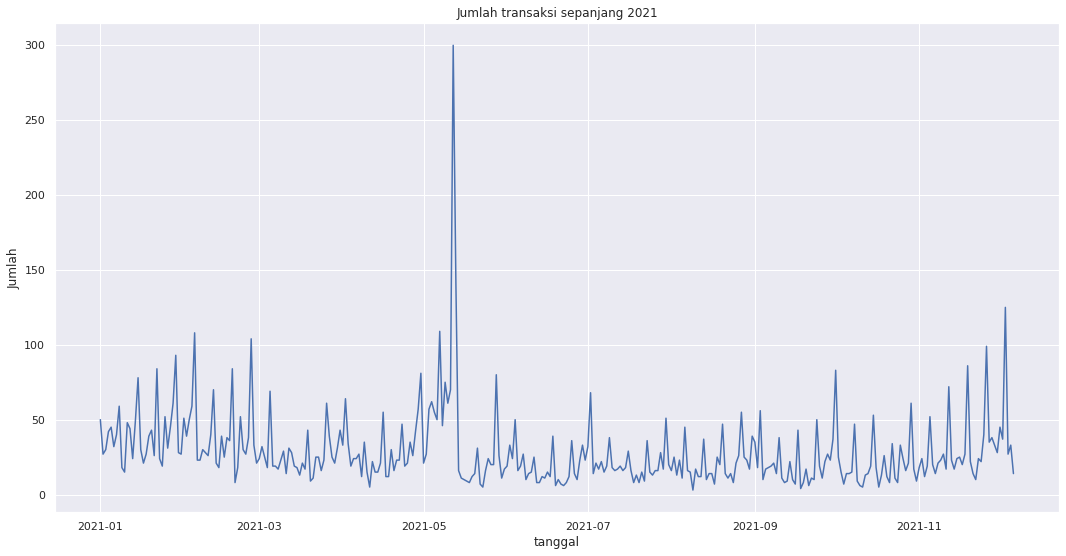

In [ ]:
plt.figure(figsize=(18,9))
sns.lineplot(data=gabung_per_hari, x='tanggal',y='Jumlah')
plt.title('Jumlah transaksi sepanjang 2021')

### Facebook Prophet Model

In [ ]:
gabung_per_hari.rename(columns={'tanggal':'ds','Jumlah':'y'}, inplace=True)
gabung_per_hari.head()

,ds,y
0,2021-01-01,50
1,2021-01-02,27
2,2021-01-03,30
3,2021-01-04,42
4,2021-01-05,45


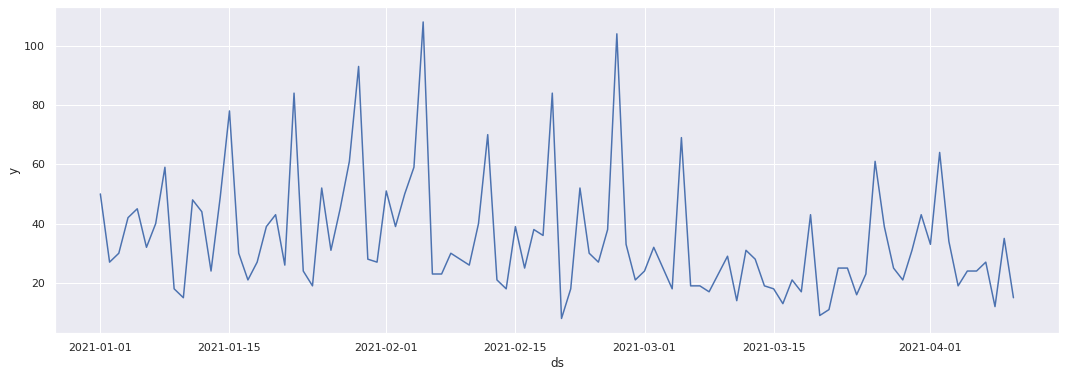

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=gabung_per_hari[:100], x='ds',y='y')

In [ ]:
train_data = gabung_per_hari.iloc[:304]
test_data = gabung_per_hari.iloc[304:]
test_data.reset_index(drop=True, inplace=True)

In [ ]:
m = Prophet(weekly_seasonality=True, yearly_seasonality=True)
m.fit(gabung_per_hari)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(340,include_history=False)
future.head()

,ds
0,2021-11-07
1,2021-11-08
2,2021-11-09
3,2021-11-10
4,2021-11-11


In [ ]:
# pakai ini jika training menggunakan semua data

future = pd.DataFrame(pd.date_range(start="2021-11-01",end="2022-11-01"), columns=['ds'])
future.head()

,ds
0,2021-11-01
1,2021-11-02
2,2021-11-03
3,2021-11-04
4,2021-11-05


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2021-11-01,18.597179,-5.195675,41.333890
1,2021-11-02,19.797136,-3.351822,43.716011
2,2021-11-03,26.376934,2.995392,47.851023
3,2021-11-04,24.048076,0.986160,46.186158
4,2021-11-05,56.436678,32.778538,79.693977


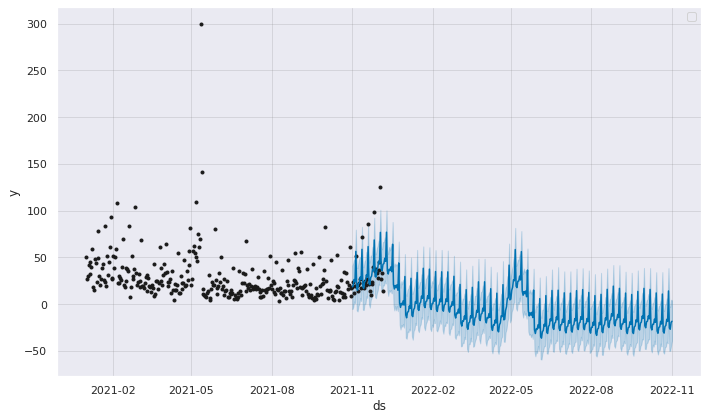

In [ ]:
fig1 = m.plot(forecast)
plt.legend()

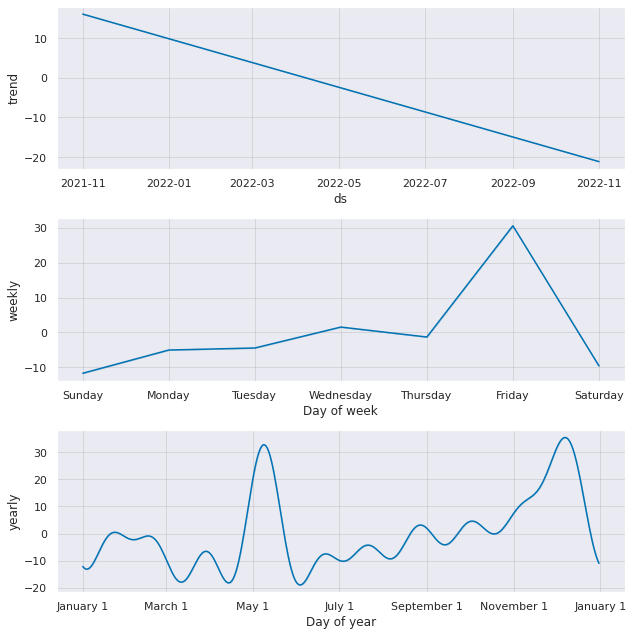

In [ ]:
fig2 = m.plot_components(forecast)

Blue -> predicted <br>
black -> actual value

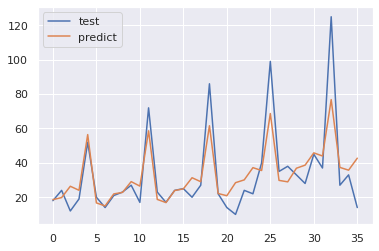

In [ ]:
test_data['y'].plot(label='test')
forecast['yhat'][:36].plot(label='predict')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np j
print("Prophet Model")
print("MAE: ",mean_absolute_error(test_data['y'],forecast['yhat']))
print("MSE: ",mean_squared_error(test_data['y'],forecast['yhat']))
print("RMSE: ", np.sqrt(mean_squared_error(test_data['y'],forecast['yhat'])))
print("R2: ",r2_score(test_data['y'],forecast['yhat']))
print("")

Prophet Model
MAE:  8.597940690449025
MSE:  179.1014891822017
RMSE:  13.382880451614357
R2:  0.7082373992001469



In [ ]:
gabung_per_hari.mean()

y    28.694118
dtype: float64

### MLP Regressor

In [ ]:
gabung_per_hari = df_gabung.groupby(pd.Grouper(key='tanggal', freq='D'))['total'].count().reset_index().rename(
    columns={'total':'Jumlah'}
)
gabung_per_hari.head()

In [ ]:
df_ml = gabung_per_hari.copy()
df_ml = df_ml.drop('tanggal', axis=1)
df_ml.head()

,Jumlah
0,50
1,27
2,30
3,42
4,45


In [ ]:
def LaggedFeatures(s,lag=2,fillna=True, dropna=False):
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print ('Only works for DataFrame or Series')
        return None
    if dropna:
        res = res.dropna()
    else:
        res = res
    if fillna:
        return res.fillna(0)
    else:
        return res 

In [ ]:
lag_df = LaggedFeatures(df_ml, lag=7, fillna=True, dropna=True)
lag_df.head()

,Jumlah,Jumlah_lag1,Jumlah_lag2,Jumlah_lag3,Jumlah_lag4,Jumlah_lag5,Jumlah_lag6,Jumlah_lag7
7,59,40.0,32.0,45.0,42.0,30.0,27.0,50.0
8,18,59.0,40.0,32.0,45.0,42.0,30.0,27.0
9,15,18.0,59.0,40.0,32.0,45.0,42.0,30.0
10,48,15.0,18.0,59.0,40.0,32.0,45.0,42.0
11,44,48.0,15.0,18.0,59.0,40.0,32.0,45.0


In [ ]:
train = lag_df.iloc[:303]
test = lag_df.iloc[303:]

In [ ]:
X_train = train.drop("Jumlah", axis=1)
X_test = test.drop("Jumlah", axis=1)

y_train = train['Jumlah']
y_test = test['Jumlah']

X_train = X_train.astype(float).values
y_train = y_train.astype(float).values

X_test = X_test.astype(float).values
y_test = y_test.astype(float).values


In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation='tanh',max_iter=1500)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("MLP")
print("MAE: ",mean_absolute_error(y_test,y_pred_mlp))
print("MSE: ",mean_squared_error(y_test,y_pred_mlp))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_mlp)))
print("R2: ",r2_score(y_test,y_pred_mlp))
print("")

MLP
MAE:  11.447876341490046
MSE:  270.16516645883587
RMSE:  16.43670181206789
R2:  0.6053268593274981



In [ ]:
print(y_test.mean())
print(y_test.max())
print(y_test.min())

34.733333333333334
125.0
10.0


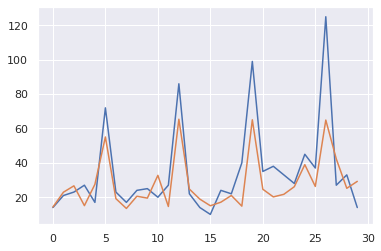

In [ ]:
plt.plot(y_test)
plt.plot(y_pred_mlp)

### SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# SVR(C=50, epsilon=1.0) best params

# regr = make_pipeline(StandardScaler(), SVR(C=50, epsilon=0.8))
regr = SVR(C=50, epsilon=1.0)
regr.fit(X_train, y_train)

SVR(C=50, epsilon=1.0)

In [ ]:
y_pred_svr = regr.predict(X_test)

print("Support Vector Regressor")
print("MAE: ",mean_absolute_error(y_test,y_pred_svr))
print("MSE: ",mean_squared_error(y_test,y_pred_svr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_svr)))
print("R2: ",r2_score(y_test,y_pred_svr))
print("")

Support Vector Regressor
MAE:  9.529910433578117
MSE:  204.34853330893628
RMSE:  14.295052756423681
R2:  0.7014756621292785



Text(0.5, 1.0, 'Hasil Prediksi SVR')

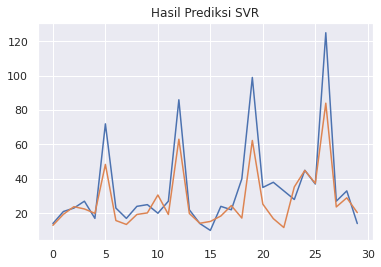

In [ ]:
plt.plot(y_test)
plt.plot(y_pred_svr)
plt.title('Hasil Prediksi SVR')

seasonality nya sudah tertangkap, tapi jumlah nya masih jauh

In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
# hiperparameter tuning 

from sklearn.model_selection import GridSearchCV

regr = SVR()
param_grid = {
    'C':[30,50,70,150], 'epsilon':[0.8,1.0]
}
SVR_Classifier = GridSearchCV(regr, param_grid, cv=10, scoring='r2', 
                             return_train_score=False)
SVR_Classifier.fit(X_train, y_train)

print('parameter ',SVR_Classifier.best_params_)
print('R2 Squre ',SVR_Classifier.best_score_)

parameter  {'C': 50, 'epsilon': 1.0}
R2 Squre  0.5038898169748465


In [ ]:
y_pred_svr = SVR_Classifier.predict(X_test)

print("Support Vector Regressor")
print("MAE: ",mean_absolute_error(y_test,y_pred_svr))
print("MSE: ",mean_squared_error(y_test,y_pred_svr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_svr)))
print("R2: ",r2_score(y_test,y_pred_svr))
print("")

Support Vector Regressor
MAE:  9.529910433578117
MSE:  204.34853330893628
RMSE:  14.295052756423681
R2:  0.7014756621292785



### XGBRegressor

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(max_depth = 4,learning_rate=0.1)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBRegressor")
print("MAE: ",mean_absolute_error(y_test,y_pred_xgb))
print("MSE: ",mean_squared_error(y_test,y_pred_xgb))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_xgb)))
print("R2: ",r2_score(y_test,y_pred_xgb))
print("")

[10:26:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor
MAE:  9.210817337036133
MSE:  170.1477918493893
RMSE:  13.044071137853754
R2:  0.7514381136995267



Text(0.5, 1.0, 'Hasil Prediksi XGBRegressor')

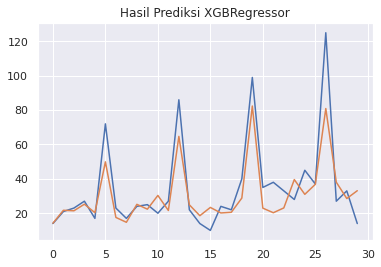

In [ ]:
plt.plot(y_test)
plt.plot(y_pred_xgb)
plt.title('Hasil Prediksi XGBRegressor')

# Forecast Jumlah Transaksi (per month & days)

## DONASI

In [ ]:
donasi_per_bulan = df_donasi.groupby(df_donasi.tanggal.dt.month)['ID'].count().reset_index().rename(columns={
    'tanggal':'bulan',
    'ID':'jumlah'
})
donasi_per_bulan.head()

,bulan,jumlah
0,1,1190
1,2,1082
2,3,787
3,4,840
4,5,1109


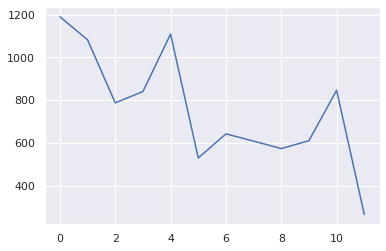

In [ ]:
donasi_per_bulan['jumlah'].plot()
# donasi_per_bulan['jumlah'].rolling(window=2).mean().plot()

#### Donasi Per Minggu

In [ ]:
donasi_per_minggu = df_donasi.groupby(pd.Grouper(key='tanggal', freq='W'))['ID'].count().reset_index().rename(
    columns={'ID':'Jumlah'}
)
donasi_per_minggu.head()

,tanggal,Jumlah
0,2021-01-03,106
1,2021-01-10,224
2,2021-01-17,288
3,2021-01-24,256
4,2021-01-31,316


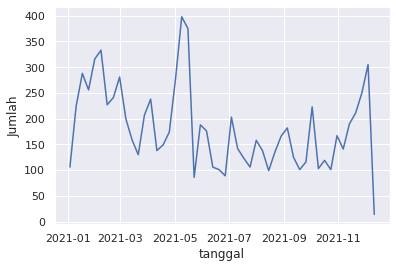

In [ ]:
sns.lineplot(data=donasi_per_minggu, x='tanggal',y='Jumlah')

#### Donasi Per Hari

In [ ]:
donasi_per_hari = df_donasi.groupby(pd.Grouper(key='tanggal', freq='D'))['ID'].count().reset_index().rename(
    columns={'ID':'Jumlah'}
)
donasi_per_hari.head()

,tanggal,Jumlah
0,2021-01-01,49
1,2021-01-02,27
2,2021-01-03,30
3,2021-01-04,31
4,2021-01-05,43


Text(0.5, 1.0, 'banyaknya donasi setiap hari (3 bulan)')

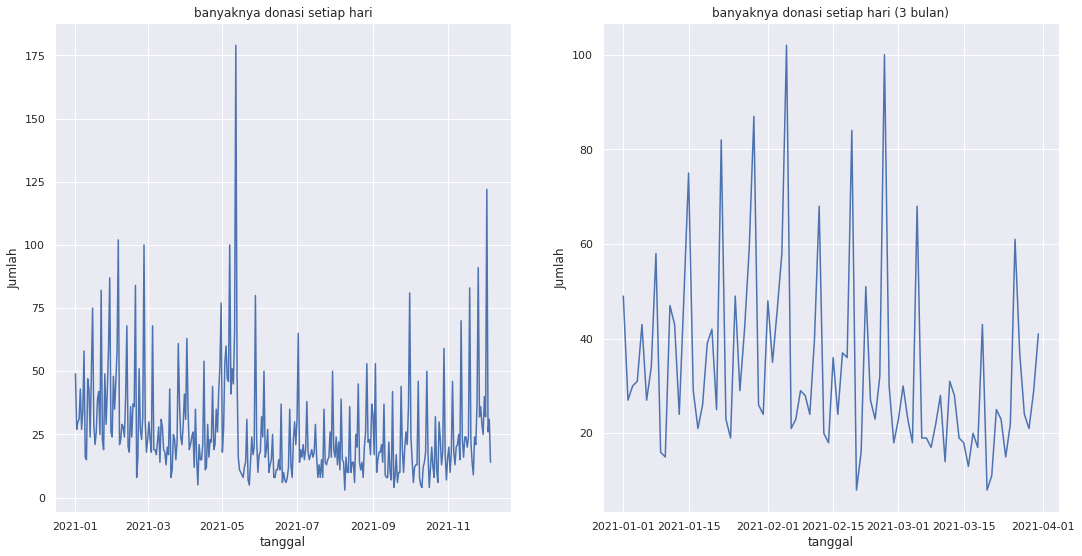

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(18,9))
sns.lineplot(data=donasi_per_hari, x='tanggal',y='Jumlah',ax=ax[0])
sns.lineplot(data=donasi_per_hari[:90], x='tanggal',y='Jumlah',ax=ax[1])

ax[0].set_title('banyaknya donasi setiap hari')

ax[1].set_title('banyaknya donasi setiap hari (3 bulan)')

# donasi_per_hari['Jumlah'].rolling(window=4).mean().plot()

### Moving Average

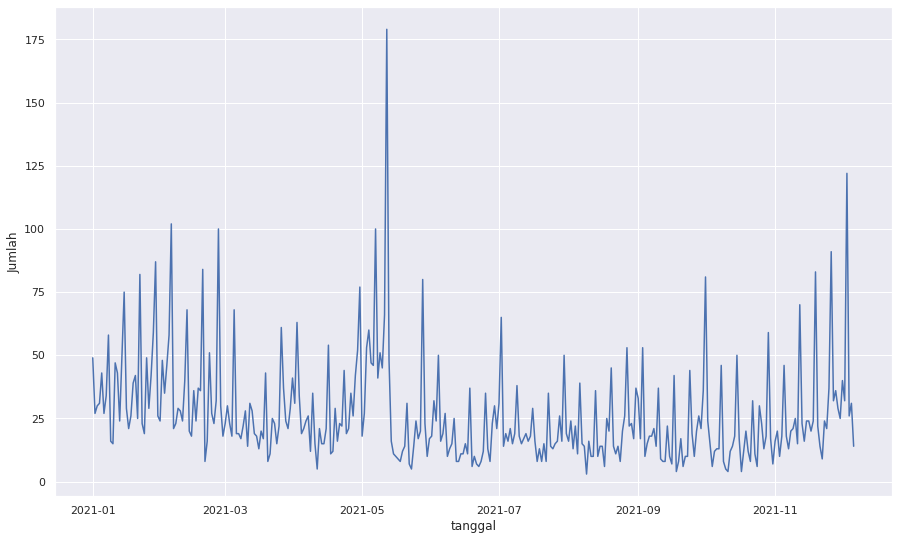

In [ ]:
plt.figure(figsize=(15,9))
sns.lineplot(data=donasi_per_hari,x='tanggal',y='Jumlah')

The next step is to test for stationarity. We intuitively know that the series is not stationary since there is an observable trend as see in the figure above. Still, we will use the ADF test to make sure. Again, we use the adfuller function from the statsmodels library and extract the ADF statistic and p-value. If the ADF statistic is a large negative number and the p-value is smaller than 0.05, then our series is stationary. Otherwise, we must apply transformations.

In [ ]:
# Check Stationer

from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(donasi_per_hari.Jumlah)   
print(f'ADF Statistic: {ADF_result[0]}') 
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -2.8693046034804324
p-value: 0.049035662242124606


In [ ]:
import numpy as np
Jumlah_diff = np.diff(donasi_per_hari.Jumlah, n=1)

In [ ]:
Jumlah_diff

In [ ]:
ADF_result = adfuller(Jumlah_diff)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -7.270976520698161
p-value: 1.5887586635908435e-10


<Figure size 1296x648 with 0 Axes>

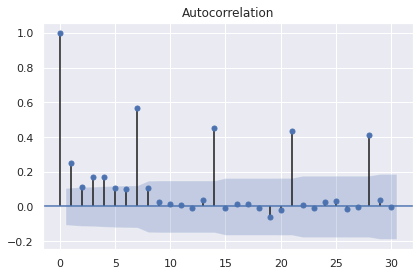

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(donasi_per_hari.Jumlah, lags=30);
plt.tight_layout()

Test MSE: 531.981


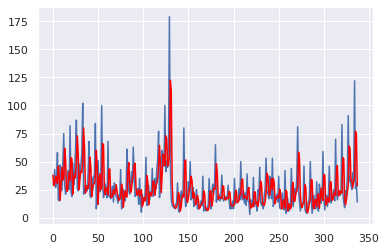

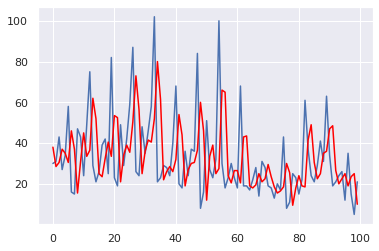

In [ ]:
from matplotlib import pyplot

X = donasi_per_hari.Jumlah
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = np.mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()

In [ ]:
np.sqrt(error)

23.064708305781135

### Facebook Prophet Model

prophet model menggunakan semua data

In [ ]:
donasi_per_hari.rename(columns={'tanggal':'ds','Jumlah':'y'}, inplace=True)

In [ ]:
train_data = donasi_per_hari.iloc[:304]
test_data = donasi_per_hari.iloc[304:]
test_data.reset_index(drop=True, inplace=True)

In [ ]:
m = Prophet(weekly_seasonality=True, yearly_seasonality=True)
m.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# future = m.make_future_dataframe(340,include_history=False)
# future.head()

In [ ]:
future = pd.DataFrame(pd.date_range(start="2021-11-01",end="2022-11-01"), columns=['ds'])
future.head()

,ds
0,2021-11-01
1,2021-11-02
2,2021-11-03
3,2021-11-04
4,2021-11-05


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2021-11-01,19.580234,1.606948,35.658346
1,2021-11-02,19.549820,3.139154,36.920330
2,2021-11-03,22.941983,5.515272,39.075719
3,2021-11-04,20.037651,4.070123,35.438921
4,2021-11-05,49.563621,33.124522,66.225775


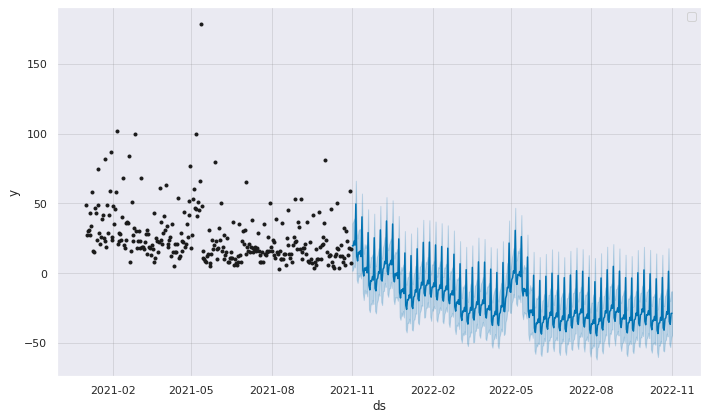

In [ ]:
fig1 = m.plot(forecast)
plt.legend()

Blue -> predicted <br>
black -> actual value

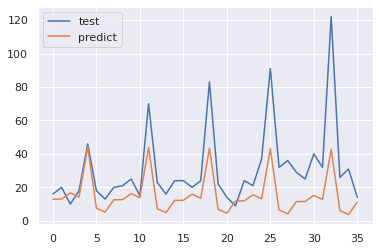

In [ ]:
test_data['y'].plot(label='test')
forecast['yhat'].plot(label='predict')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np j
print("Prophet Model")
print("MAE: ",mean_absolute_error(test_data['y'],forecast['yhat'][:30]))
print("MSE: ",mean_squared_error(test_data['y'],forecast['yhat'][:30]))
print("RMSE: ", np.sqrt(mean_squared_error(test_data['y'],forecast['yhat'][:30])))
print("R2: ",r2_score(test_data['y'],forecast['yhat'][:30]))
print("")

Prophet Model
MAE:  8.493807096915877
MSE:  180.99662507066554
RMSE:  13.453498618228105
R2:  0.7128157057591327



In [ ]:
donasi_per_hari.mean()

y    26.708824
dtype: float64

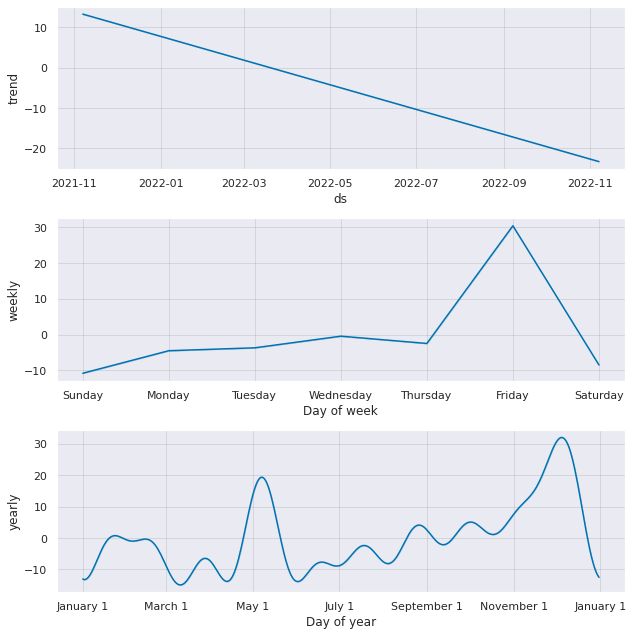

In [ ]:
fig2 = m.plot_components(forecast)

### Simple Smoothing

In [ ]:
SimpleExpSmoothing?

In [ ]:
# Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df1_ses = donasi_per_hari.copy()
# df1_ses = df1_ses.reset_index()

model_ses = SimpleExpSmoothing(df1_ses['Jumlah'])
fitted_model_ses = model_ses.fit(smoothing_level=0.3,optimized=False,use_brute=True) # bisa masukin alpha
df1_ses['SES_0.3'] = fitted_model_ses.fittedvalues

fitted_model_ses = model_ses.fit(smoothing_level=0.8,optimized=True,use_brute=False) # bisa masukin alpha
df1_ses['SES_0.8'] = fitted_model_ses.fittedvalues

df1_ses.head(10)

,tanggal,Jumlah,SES_0.3,SES_0.8
0,2021-01-01,49,49.000000,44.742696
1,2021-01-02,27,49.000000,48.148539
2,2021-01-03,30,42.400000,31.229708
3,2021-01-04,31,38.680000,30.245942
4,2021-01-05,43,36.376000,30.849188
5,2021-01-06,27,38.363200,40.569838
6,2021-01-07,34,34.954240,29.713968
7,2021-01-08,58,34.667968,33.142794
8,2021-01-09,16,41.667578,53.028559
9,2021-01-10,15,33.967304,23.405712


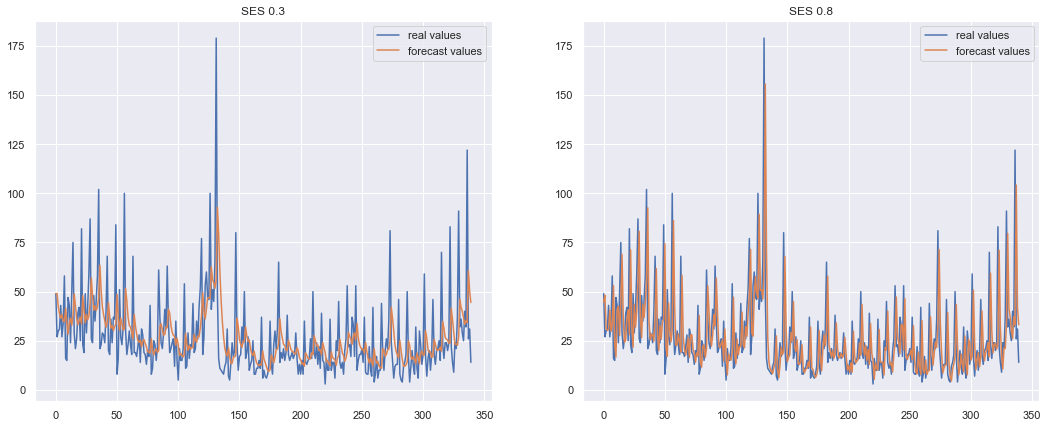

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18,7)) 

axs[0].plot(df1_ses['Jumlah'],label='real values')
axs[0].plot(df1_ses['SES_0.3'],label='forecast values')
axs[0].set_title("SES 0.3") 
axs[0].legend()


axs[1].plot(df1_ses['Jumlah'],label='real values')
axs[1].plot(df1_ses['SES_0.8'],label='forecast values')
axs[1].set_title("SES 0.8") 
axs[1].legend()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np 

print("SimpleSmoothing")
print("MAE: ",mean_absolute_error(df1_ses['Jumlah'],df1_ses['SES_0.8']))
print("MSE: ",mean_squared_error(df1_ses['Jumlah'],df1_ses['SES_0.8']))
print("RMSE: ", np.sqrt(mean_squared_error(df1_ses['Jumlah'],df1_ses['SES_0.8'])))
print("R2: ",r2_score(df1_ses['Jumlah'],df1_ses['SES_0.8']))
print("")

SimpleSmoothing
MAE:  15.752144464973636
MSE:  542.4739976214045
RMSE:  23.29107119952632
R2:  -0.2877435678072282



### EXP Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train_data = donasi_per_hari.iloc[:310]
test_data = donasi_per_hari.iloc[310:]

fitted_model = ExponentialSmoothing(train_data['Jumlah'], trend='mul', seasonal_periods=280, seasonal='multiplicative').fit()

predict = fitted_model.forecast(30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



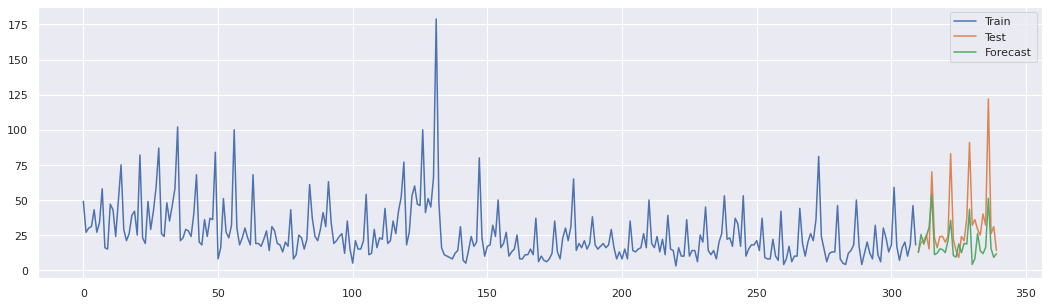

In [ ]:
plt.figure(figsize=(18,9))
train_data['Jumlah'].plot(legend=True, label = 'Train', figsize=(18,5))
test_data['Jumlah'].plot(legend=True, label = 'Test')
predict.plot(legend=True, label = "Forecast")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np 

print("SARIMAX")
print("MAE: ",mean_absolute_error(test_data['Jumlah'],predict))
print("MSE: ",mean_squared_error(test_data['Jumlah'],predict))
print("RMSE: ", np.sqrt(mean_squared_error(test_data['Jumlah'],predict)))
print("R2: ",r2_score(test_data['Jumlah'],predict))
print("")

SARIMAX
MAE:  11.79526559917831
MSE:  224.0274729789864
RMSE:  14.967547326766212
R2:  0.6445393846823588



### SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data['Jumlah'], seasonal_order=(1,1,1,280))
result = model.fit()

start = len(train_data)
end = len(train_data)+len(test_dyata)-1

predictions = result.predict(start, end,typ = 'levels').rename("SARIMA forecast")

train_data['Jumlah'].plot(legend=True, label = 'Train', figsize=(19,5))
test_data['Jumlah'].plot(legend=True, label = 'Test')
predictions.plot(legend=True, label = "Forecast")

MemoryError: Unable to allocate 747. MiB for an array with shape (561, 561, 311) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 982, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions.MemoryError: Unable to allocate 747. MiB for an array with shape (561, 561, 311) and data type float64


AttributeError: Memoryview is not initialized

In [ ]:
result.predict?

In [ ]:
train_data = donasi_per_hari.iloc[:310]
test_data = donasi_per_hari.iloc[310:]
test_data.reset_index(drop=True, inplace=True)

In [ ]:
X_train = np.array(train_data['tanggal']).reshape(-1,1)
y_train = train_data['Jumlah']
X_test = np.array(test_data['tanggal']).reshape(-1,1)
y_test = test_data['Jumlah']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=10)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_train_predicted = poly_model.predict(X_train_poly)
  
# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

In [ ]:
y_test_predict

array([14.74225286, 14.66539065, 14.5884919 , 14.51155659, 14.43458473,
       14.35757628, 14.28053124, 14.20344958, 14.1263313 , 14.04917637,
       13.97198479, 13.89475654, 13.81749159, 13.74018994, 13.66285157,
       13.58547647, 13.50806461, 13.43061599, 13.35313058, 13.27560838,
       13.19804936, 13.12045352, 13.04282083, 12.96515128, 12.88744486,
       12.80970155, 12.73192133, 12.65410419, 12.57625011, 12.49835907])

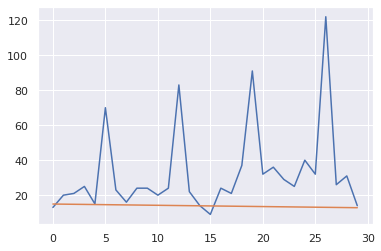

In [ ]:
plt.plot(y_test)
plt.plot(y_test_predict)

### MLP Regressor

In [ ]:
df_ml = donasi_per_hari.copy()
df_ml = df_ml.drop('tanggal', axis=1)
df_ml.head()

,Jumlah
0,49
1,27
2,30
3,31
4,43


In [ ]:
def LaggedFeatures(s,lag=2,fillna=True, dropna=False):
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print ('Only works for DataFrame or Series')
        return None
    if dropna:
        res = res.dropna()
    else:
        res = res
    if fillna:
        return res.fillna(0)
    else:
        return res 

In [ ]:
lag_df = LaggedFeatures(df_ml, lag=7, fillna=True, dropna=True)
lag_df.head()

,Jumlah,Jumlah_lag1,Jumlah_lag2,Jumlah_lag3,Jumlah_lag4,Jumlah_lag5,Jumlah_lag6,Jumlah_lag7
7,58,34.0,27.0,43.0,31.0,30.0,27.0,49.0
8,16,58.0,34.0,27.0,43.0,31.0,30.0,27.0
9,15,16.0,58.0,34.0,27.0,43.0,31.0,30.0
10,47,15.0,16.0,58.0,34.0,27.0,43.0,31.0
11,43,47.0,15.0,16.0,58.0,34.0,27.0,43.0


In [ ]:
train = lag_df.iloc[:303]
test = lag_df.iloc[303:]

In [ ]:
X_train = train.drop("Jumlah", axis=1)
X_test = test.drop("Jumlah", axis=1)

y_train = train['Jumlah']
y_test = test['Jumlah']

X_train = X_train.astype(float).values
y_train = y_train.astype(float).values

X_test = X_test.astype(float).values
y_test = y_test.astype(float).values


In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation='relu',max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("MLP")
print("MAE: ",mean_absolute_error(y_test,y_pred_mlp))
print("MSE: ",mean_squared_error(y_test,y_pred_mlp))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_mlp)))
print("R2: ",r2_score(y_test,y_pred_mlp))
print("")

MLP
MAE:  11.29751032497979
MSE:  262.2297481229759
RMSE:  16.19350944431058
R2:  0.5839244786235378



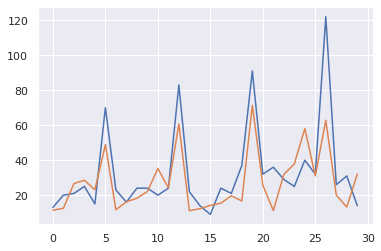

In [ ]:
plt.plot(y_test)
plt.plot(y_pred_mlp)

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [ ]:
y_pred_sgd = reg.predict(X_test)

print("SGD")
print("MAE: ",mean_absolute_error(y_test,y_pred_sgd))
print("MSE: ",mean_squared_error(y_test,y_pred_sgd))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_sgd)))
print("R2: ",r2_score(y_test,y_pred_sgd))
print("")

SGD
MAE:  12.267072961989038
MSE:  350.4537402228522
RMSE:  18.720409723690672
R2:  0.44394095740360995



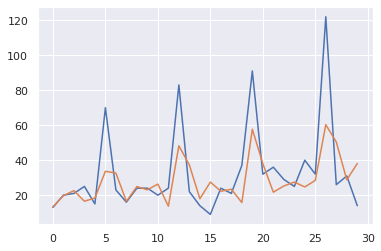

In [ ]:
plt.plot(y_test)
plt.plot(y_pred_sgd)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

print("Liner Regression")
print("MAE: ",mean_absolute_error(y_test,y_pred_lr))
print("MSE: ",mean_squared_error(y_test,y_pred_lr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("R2: ",r2_score(y_test,y_pred_lr))
print("")

Liner Regression
MAE:  12.185675588471039
MSE:  345.82959568194707
RMSE:  18.596494177181544
R2:  0.4512780096051586



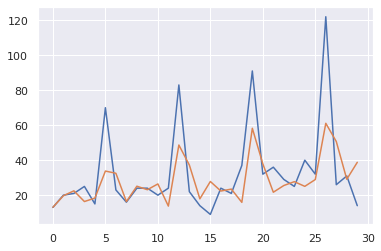

In [ ]:
plt.plot(y_test)
plt.plot(y_pred_lr)

### SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# SVR(C=30, epsilon=0.8) best params

regr = make_pipeline(StandardScaler(), SVR(C=30, epsilon=0.8))
regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=30, epsilon=0.8))])

In [ ]:
y_pred_svr = regr.predict(X_test)

print("Support Vector Regressor")
print("MAE: ",mean_absolute_error(y_test,y_pred_svr))
print("MSE: ",mean_squared_error(y_test,y_pred_svr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_svr)))
print("R2: ",r2_score(y_test,y_pred_svr))
print("")

Support Vector Regressor
MAE:  9.867695347932871
MSE:  217.52924478156095
RMSE:  14.748872661378597
R2:  0.6548500138334004



Text(0.5, 1.0, 'Hasil Prediksi SVR')

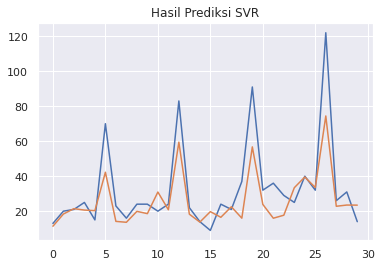

In [ ]:
plt.plot(y_test)
plt.plot(y_pred_svr)
plt.title('Hasil Prediksi SVR')

seasonality nya sudah tertangkap, tapi jumlah nya masih jauh

### XGBRegressor

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(max_depth = 3)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBRegressor")
print("MAE: ",mean_absolute_error(y_test,y_pred_xgb))
print("MSE: ",mean_squared_error(y_test,y_pred_xgb))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_xgb)))
print("R2: ",r2_score(y_test,y_pred_xgb))
print("")

[10:29:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor
MAE:  9.364809481302897
MSE:  174.09233580836232
RMSE:  13.19440547384998
R2:  0.7237706251575204



Text(0.5, 1.0, 'Hasil Prediksi XGBRegressor')

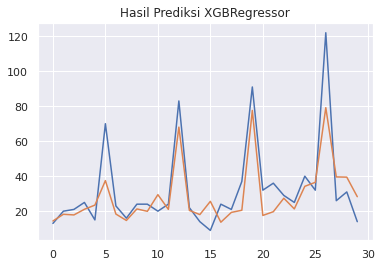

In [ ]:
plt.plot(y_test)
plt.plot(y_pred_xgb)
plt.title('Hasil Prediksi XGBRegressor')

## ZAKAT

In [ ]:
zakat_per_bulan = df_zakat.groupby(df_zakat.tanggal.dt.month)['ID'].count().reset_index().rename(columns={
    'tanggal':'bulan',
    'ID':'jumlah'
})
zakat_per_bulan

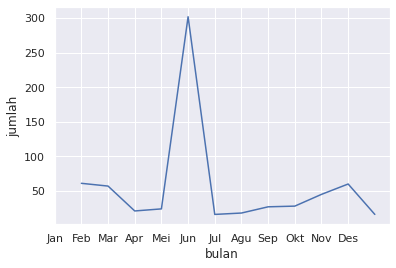

In [ ]:
sns.lineplot(data=zakat_per_bulan,x='bulan',y='jumlah')
plt.xticks(range(12),lists_of_month)
plt.show()

In [ ]:
zakat_per_hari = df_zakat.groupby(pd.Grouper(key='tanggal', freq='D'))['ID'].count().reset_index().rename(columns={
    'ID':'jumlah'
})
zakat_per_hari

,tanggal,jumlah
0,2021-01-01,1
1,2021-01-02,0
2,2021-01-03,0
3,2021-01-04,11
4,2021-01-05,2
...,...,...
334,2021-12-01,5
335,2021-12-02,5
336,2021-12-03,3
337,2021-12-04,1


### Facebook Prophet Model

In [ ]:
zakat_per_hari.rename(columns={'tanggal':'ds','jumlah':'y'}, inplace=True)
zakat_per_hari.head()

,ds,y
0,2021-01-01,1
1,2021-01-02,0
2,2021-01-03,0
3,2021-01-04,11
4,2021-01-05,2


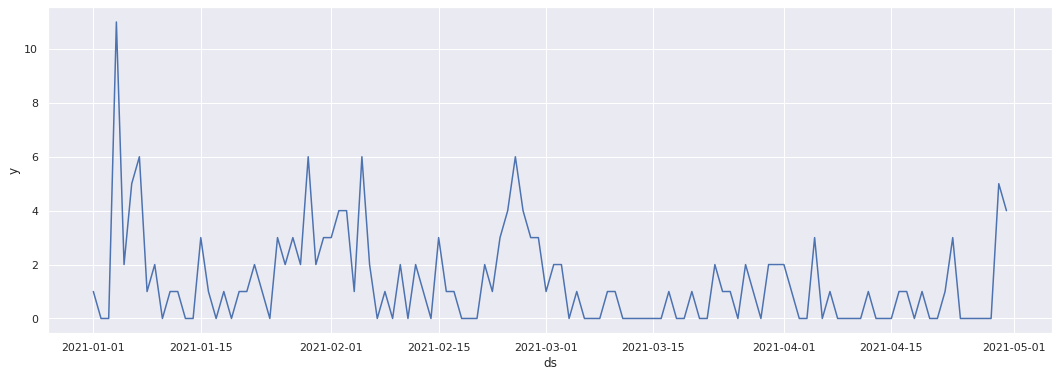

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=zakat_per_hari[:120], x='ds',y='y')

In [ ]:
train_data = zakat_per_hari.iloc[:304]
test_data = zakat_per_hari.iloc[304:]
test_data.reset_index(drop=True, inplace=True)

In [ ]:
m = Prophet(weekly_seasonality=True)
m.fit(zakat_per_hari)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(60,include_history=False)
future.head()

,ds
0,2021-11-07
1,2021-11-08
2,2021-11-09
3,2021-11-10
4,2021-11-11


In [ ]:
# pakai ini jika training menggunakan semua data

future = pd.DataFrame(pd.date_range(start="2021-11-01",end="2021-12-05"), columns=['ds'])
future.head()

,ds
0,2021-11-01
1,2021-11-02
2,2021-11-03
3,2021-11-04
4,2021-11-05


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2021-11-01,0.998243,-10.379954,12.103393
1,2021-11-02,0.661585,-9.452764,10.478327
2,2021-11-03,3.413592,-7.284812,14.256749
3,2021-11-04,2.597005,-8.273586,12.752983
4,2021-11-05,1.628209,-8.169458,11.955401


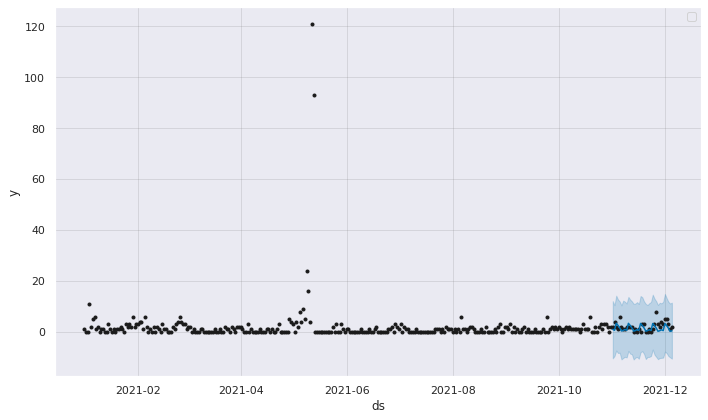

In [ ]:
fig1 = m.plot(forecast)
plt.legend()

Blue -> predicted <br>
black -> actual value

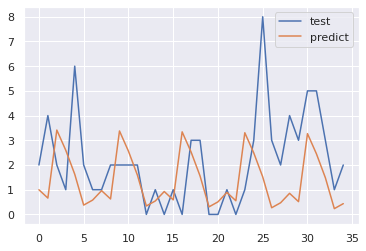

In [ ]:
test_data['y'].plot(label='test')
forecast['yhat'].plot(label='predict')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np j
print("Prophet Model")
print("MAE: ",mean_absolute_error(test_data['y'],forecast['yhat']))
print("MSE: ",mean_squared_error(test_data['y'],forecast['yhat']))
print("RMSE: ", np.sqrt(mean_squared_error(test_data['y'],forecast['yhat'])))
print("R2: ",r2_score(test_data['y'],forecast['yhat']))
print("")

Prophet Model
MAE:  1.5343795786733578
MSE:  4.18896551136505
RMSE:  2.0466962430622306
R2:  -0.2752193716257918



In [ ]:
zakat_per_hari.mean()

y    1.99115
dtype: float64

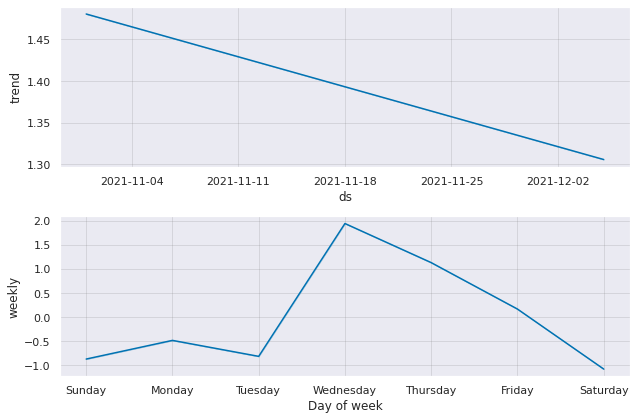

In [ ]:
fig2 = m.plot_components(forecast)

### ExponentialSmoothing

In [ ]:
ExponentialSmoothing?

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train_data = zakat_per_hari.iloc[:310]
test_data = zakat_per_hari.iloc[309:]

fitted_model = ExponentialSmoothing(train_data['jumlah'], trend='add', seasonal_periods=24, seasonal='additive').fit()

predict = fitted_model.forecast(30)

<AxesSubplot:>

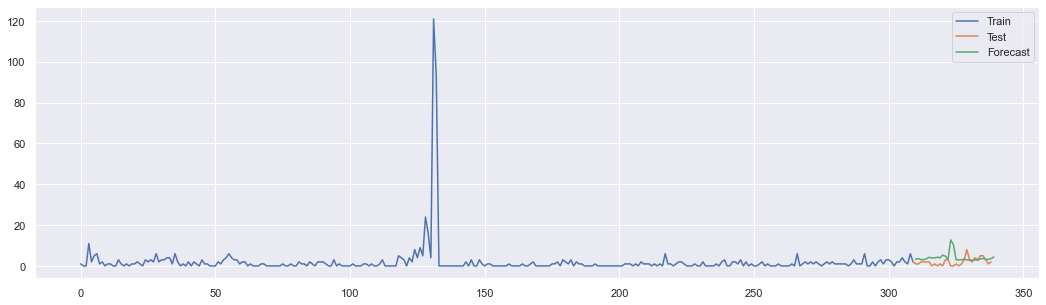

In [ ]:
plt.figure(figsize=(18,9))
train_data['jumlah'].plot(legend=True, label = 'Train', figsize=(18,5))
test_data['jumlah'].plot(legend=True, label = 'Test')
predict.plot(legend=True, label = "Forecast")

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np j
print("SARIMAX")
print("MAE: ",mean_absolute_error(test_data['jumlah'],predict))
print("MSE: ",mean_squared_error(test_data['jumlah'],predict))
print("RMSE: ", np.sqrt(mean_squared_error(test_data['jumlah'],predict)))
print("R2: ",r2_score(test_data['jumlah'],predict))
print("")

SARIMAX
MAE:  2.3263616020671787
MSE:  9.435967498537757
RMSE:  3.0718019953339697
R2:  -1.9808251136131911



### MLP Regressor

In [ ]:
df_ml = zakat_per_hari.copy()
df_ml = df_ml.drop('tanggal', axis=1)
df_ml.head()

,jumlah
0,1
1,0
2,0
3,11
4,2


In [ ]:
def LaggedFeatures(s,lag=2,fillna=True, dropna=False):
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print ('Only works for DataFrame or Series')
        return None
    if dropna:
        res = res.dropna()
    else:
        res = res
    if fillna:
        return res.fillna(0)
    else:
        return res 

In [ ]:
lag_df = LaggedFeatures(df_ml, lag=7, fillna=True, dropna=True)
lag_df.head()

,jumlah,jumlah_lag1,jumlah_lag2,jumlah_lag3,jumlah_lag4,jumlah_lag5,jumlah_lag6,jumlah_lag7
7,1,6.0,5.0,2.0,11.0,0.0,0.0,1.0
8,2,1.0,6.0,5.0,2.0,11.0,0.0,0.0
9,0,2.0,1.0,6.0,5.0,2.0,11.0,0.0
10,1,0.0,2.0,1.0,6.0,5.0,2.0,11.0
11,1,1.0,0.0,2.0,1.0,6.0,5.0,2.0


In [ ]:
train = lag_df.iloc[:303]
test = lag_df.iloc[303:]

In [ ]:
X_train = train.drop("jumlah", axis=1)
X_test = test.drop("jumlah", axis=1)

y_train = train['jumlah']
y_test = test['jumlah']

X_train = X_train.astype(float).values
y_train = y_train.astype(float).values

X_test = X_test.astype(float).values
y_test = y_test.astype(float).values


In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation='relu',max_iter=2000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("MLP")
print("MAE: ",mean_absolute_error(y_test,y_pred_mlp))
print("MSE: ",mean_squared_error(y_test,y_pred_mlp))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_mlp)))
print("R2: ",r2_score(y_test,y_pred_mlp))
print("")

MLP
MAE:  2.992837558777885
MSE:  19.45568484709246
RMSE:  4.410859876157081
R2:  -4.941260332754089



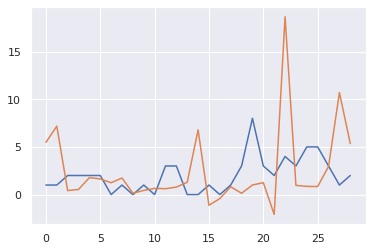

In [ ]:
plt.plot(y_test)
plt.plot(y_pred_mlp)

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [ ]:
y_pred_sgd = reg.predict(X_test)

print("SGD")
print("MAE: ",mean_absolute_error(y_test,y_pred_sgd))
print("MSE: ",mean_squared_error(y_test,y_pred_sgd))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_sgd)))
print("R2: ",r2_score(y_test,y_pred_sgd))
print("")

SGD
MAE:  12.267072961989038
MSE:  350.4537402228522
RMSE:  18.720409723690672
R2:  0.44394095740360995



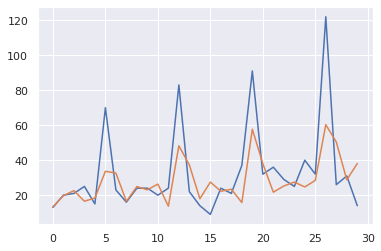

In [ ]:
plt.plot(y_test)
plt.plot(y_pred_sgd)

---

# Forecasting total transaksi

## DONASI

In [ ]:
sum_donasi_per_hari = df_donasi.groupby(pd.Grouper(key='tanggal', freq='D'))['total_donasi'].sum().reset_index()
sum_donasi_per_hari

,tanggal,total_donasi
0,2021-01-01,9104921.0
1,2021-01-02,18147735.0
2,2021-01-03,4549815.0
3,2021-01-04,7592243.0
4,2021-01-05,5664702.0
...,...,...
335,2021-12-02,9457924.0
336,2021-12-03,21347947.0
337,2021-12-04,4513792.0
338,2021-12-05,3230000.0


### Facebook Prophet Model

prophet model menggunakan semua data

In [ ]:
sum_donasi_per_hari.rename(columns={'tanggal':'ds','total_donasi':'y'}, inplace=True)
sum_donasi_per_hari.head()

,ds,y
0,2021-01-01,9104921.0
1,2021-01-02,18147735.0
2,2021-01-03,4549815.0
3,2021-01-04,7592243.0
4,2021-01-05,5664702.0


In [ ]:
train_data = sum_donasi_per_hari.iloc[:304]
test_data = sum_donasi_per_hari.iloc[304:]
test_data.reset_index(drop=True, inplace=True)

In [ ]:
m = Prophet(weekly_seasonality=True, yearly_seasonality=True)
m.fit(sum_donasi_per_hari)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(340,include_history=False)
future.head()

,ds
0,2021-12-07
1,2021-12-08
2,2021-12-09
3,2021-12-10
4,2021-12-11


In [ ]:
future = pd.DataFrame(pd.date_range(start="2021-11-01",end="2021-12-06"), columns=['ds'])
future.head()

,ds
0,2021-11-01
1,2021-11-02
2,2021-11-03
3,2021-11-04
4,2021-11-05


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2021-12-07,9.090244e+06,3.142426e+06,1.495803e+07
1,2021-12-08,1.030184e+07,4.052718e+06,1.635667e+07
2,2021-12-09,9.691165e+06,3.127414e+06,1.576139e+07
3,2021-12-10,1.535624e+07,9.205369e+06,2.168566e+07
4,2021-12-11,8.599635e+06,2.609959e+06,1.462582e+07


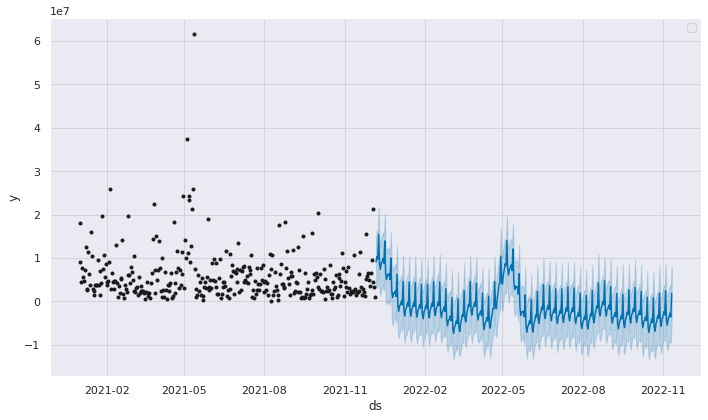

In [ ]:
fig1 = m.plot(forecast)
plt.legend()

Blue -> predicted <br>
black -> actual value

In [ ]:
forecast['yhat_new'] = forecast['yhat'].apply(lambda x : math.ceil(x))
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,yhat_new
0,2021-12-07,2.606865e+06,3.142426e+06,1.495803e+07,2.606865e+06,2.606865e+06,6.483379e+06,6.483379e+06,6.483379e+06,-4.878986e+05,-4.878986e+05,-4.878986e+05,6.971278e+06,6.971278e+06,6.971278e+06,0.0,0.0,0.0,9.090244e+06,9090245
1,2021-12-08,2.585810e+06,4.052718e+06,1.635667e+07,2.585810e+06,2.585810e+06,7.716029e+06,7.716029e+06,7.716029e+06,5.030866e+05,5.030866e+05,5.030866e+05,7.212943e+06,7.212943e+06,7.212943e+06,0.0,0.0,0.0,1.030184e+07,10301840
2,2021-12-09,2.564756e+06,3.127414e+06,1.576139e+07,2.564756e+06,2.564756e+06,7.126409e+06,7.126409e+06,7.126409e+06,-2.631298e+05,-2.631298e+05,-2.631298e+05,7.389539e+06,7.389539e+06,7.389539e+06,0.0,0.0,0.0,9.691165e+06,9691165
3,2021-12-10,2.543702e+06,9.205369e+06,2.168566e+07,2.543702e+06,2.543702e+06,1.281254e+07,1.281254e+07,1.281254e+07,5.316117e+06,5.316117e+06,5.316117e+06,7.496424e+06,7.496424e+06,7.496424e+06,0.0,0.0,0.0,1.535624e+07,15356244
4,2021-12-11,2.522647e+06,2.609959e+06,1.462582e+07,2.522647e+06,2.522648e+06,6.076987e+06,6.076987e+06,6.076987e+06,-1.453366e+06,-1.453366e+06,-1.453366e+06,7.530354e+06,7.530354e+06,7.530354e+06,0.0,0.0,0.0,8.599635e+06,8599635


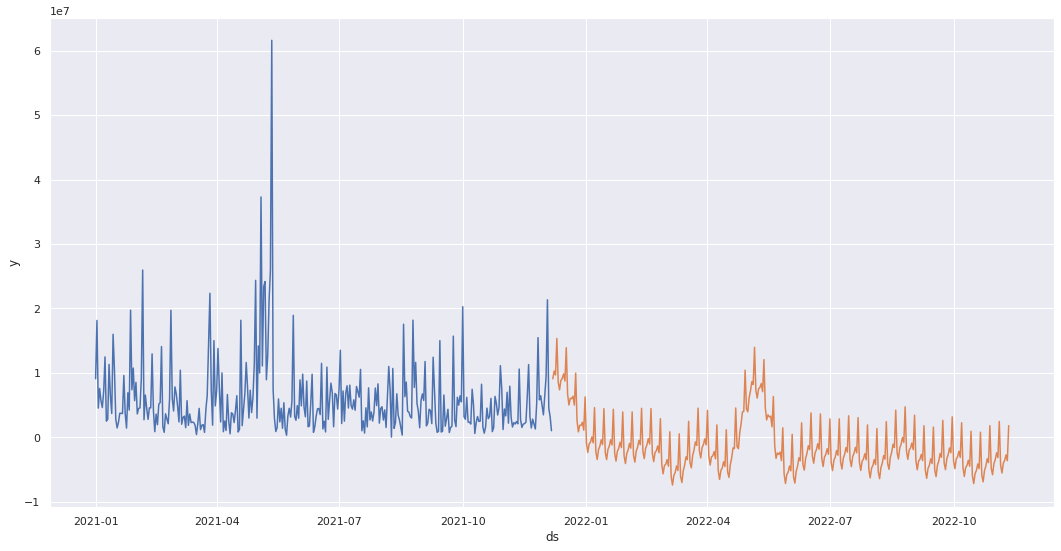

In [ ]:
plt.figure(figsize=(18,9))
sns.lineplot(data=sum_donasi_per_hari,x='ds',y='y')
sns.lineplot(data=forecast,x='ds',y='yhat_new')

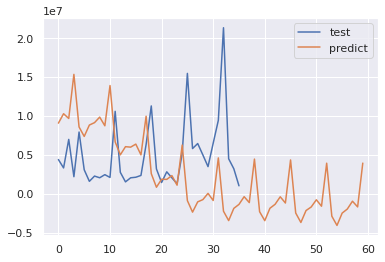

In [ ]:
test_data['y'].plot(label='test')
forecast['yhat'].plot(label='predict')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np j
print("Prophet Model")
print("MAE: ",mean_absolute_error(test_data['y'],forecast['yhat'][:30]))
print("MSE: ",mean_squared_error(test_data['y'],forecast['yhat'][:30]))
print("RMSE: ", np.sqrt(mean_squared_error(test_data['y'],forecast['yhat'][:30])))
print("R2: ",r2_score(test_data['y'],forecast['yhat'][:30]))
print("")

Prophet Model
MAE:  8.493807096915877
MSE:  180.99662507066554
RMSE:  13.453498618228105
R2:  0.7128157057591327



In [ ]:
donasi_per_hari.mean()

y    26.708824
dtype: float64

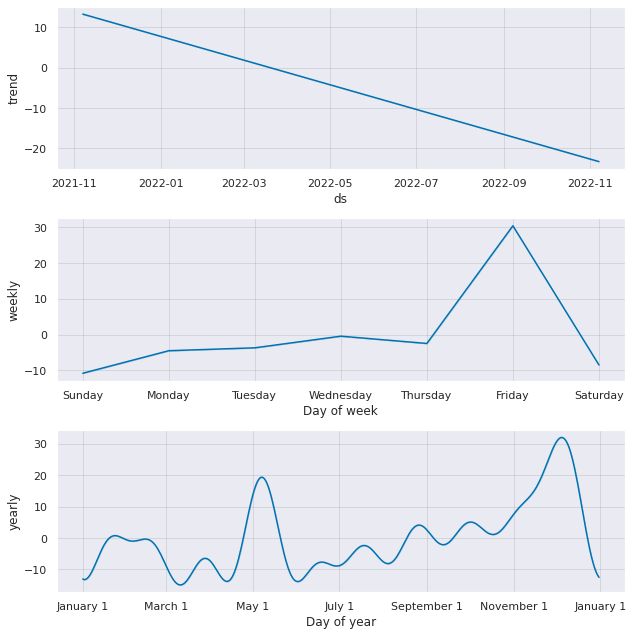

In [ ]:
fig2 = m.plot_components(forecast)

### Exp Smoothing

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:>

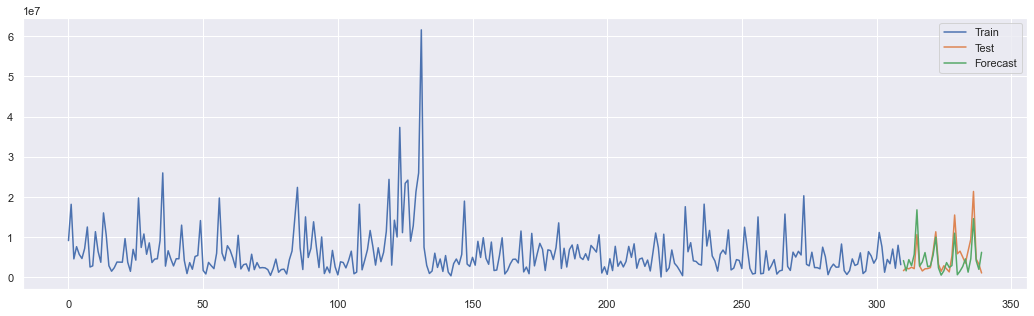

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train_data = sum_donasi_per_hari.iloc[:310]
test_data = sum_donasi_per_hari.iloc[310:]

fitted_model = ExponentialSmoothing(train_data['total_donasi'], trend='add', seasonal_periods=70, seasonal='additive').fit()

predict = fitted_model.forecast(30)

plt.figure(figsize=(18,9))
train_data['total_donasi'].plot(legend=True, label = 'Train', figsize=(18,5))
test_data['total_donasi'].plot(legend=True, label = 'Test')
predict.plot(legend=True, label = "Forecast")

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np j
print("SARIMAX")
print("MAE: ",mean_absolute_error(test_data['total_donasi'],predict))
print("MSE: ",mean_squared_error(test_data['total_donasi'],predict))
print("RMSE: ", np.sqrt(mean_squared_error(test_data['total_donasi'],predict)))
print("R2: ",r2_score(test_data['total_donasi'],predict))
print("")

SARIMAX
MAE:  2503240.951018659
MSE:  10158989661352.582
RMSE:  3187317.000449215
R2:  0.50976418117364



### MLP Regressor

In [ ]:
sum_donasi_per_hari = df_donasi.groupby(pd.Grouper(key='tanggal', freq='D'))['total_donasi'].sum().reset_index()
sum_donasi_per_hari

In [ ]:
df_ml = sum_donasi_per_hari.copy()
df_ml = df_ml.drop('tanggal', axis=1)
df_ml.head()
print(df_ml.shape)

(340, 1)


In [ ]:
def LaggedFeatures(s,lag=2,fillna=True, dropna=False):
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print ('Only works for DataFrame or Series')
        return None
    if dropna:
        res = res.dropna()
    else:
        res = res
    if fillna:
        return res.fillna(0)
    else:
        return res 

In [ ]:
lag_df = LaggedFeatures(df_ml, lag=7, fillna=True, dropna=True)
lag_df.head()

,total_donasi,total_donasi_lag1,total_donasi_lag2,total_donasi_lag3,total_donasi_lag4,total_donasi_lag5,total_donasi_lag6,total_donasi_lag7
7,12493216.0,7127387.0,4640977.0,5664702.0,7592243.0,4549815.0,18147735.0,9104921.0
8,2525627.0,12493216.0,7127387.0,4640977.0,5664702.0,7592243.0,4549815.0,18147735.0
9,2811133.0,2525627.0,12493216.0,7127387.0,4640977.0,5664702.0,7592243.0,4549815.0
10,11328655.0,2811133.0,2525627.0,12493216.0,7127387.0,4640977.0,5664702.0,7592243.0
11,6396030.0,11328655.0,2811133.0,2525627.0,12493216.0,7127387.0,4640977.0,5664702.0


In [ ]:
train = lag_df.iloc[:303]
test = lag_df.iloc[303:]

In [ ]:
X_train = train.drop("total_donasi", axis=1)
X_test = test.drop("total_donasi", axis=1)

y_train = train['total_donasi']
y_test = test['total_donasi']

X_train = X_train.astype(float).values
y_train = y_train.astype(float).values

X_test = X_test.astype(float).values
y_test = y_test.astype(float).values


In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation='relu',max_iter=500)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("MLP")
print("MAE: ",mean_absolute_error(y_test,y_pred_mlp))
print("MSE: ",mean_squared_error(y_test,y_pred_mlp))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_mlp)))
print("R2: ",r2_score(y_test,y_pred_mlp))
print("")

MLP
MAE:  2252991.0865346016
MSE:  9435567187627.398
RMSE:  3071736.8356725154
R2:  0.5446739133995941



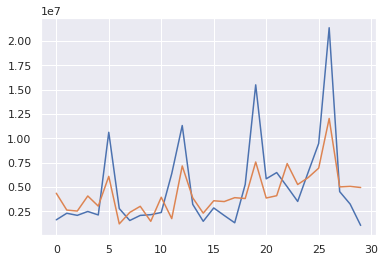

In [ ]:
plt.plot(y_test)
plt.plot(y_pred_mlp)

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=2000, epsilon=0.8))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(epsilon=0.8, max_iter=2000))])

In [ ]:
y_pred_sgd = reg.predict(X_test)

print("SGD")
print("MAE: ",mean_absolute_error(y_test,y_pred_sgd))
print("MSE: ",mean_squared_error(y_test,y_pred_sgd))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_sgd)))
print("R2: ",r2_score(y_test,y_pred_sgd))
print("")

SGD
MAE:  3026959.5288157864
MSE:  16324165845479.684
RMSE:  4040317.5426542507
R2:  0.21225524617272384



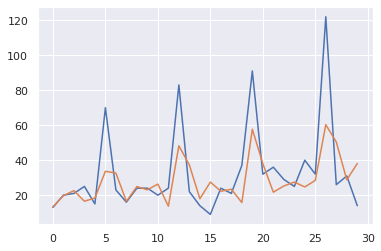

In [ ]:
plt.plot(y_test)
plt.plot(y_pred_sgd)

## ZAKAT

In [ ]:
zakat_per_hari = df_zakat.groupby(pd.Grouper(key='tanggal', freq='D'))['ID'].count().reset_index().rename(columns={
    'ID':'jumlah'
})
zakat_per_hari

,tanggal,jumlah
0,2021-01-01,1
1,2021-01-02,0
2,2021-01-03,0
3,2021-01-04,11
4,2021-01-05,2
...,...,...
334,2021-12-01,5
335,2021-12-02,5
336,2021-12-03,3
337,2021-12-04,1


<AxesSubplot:>

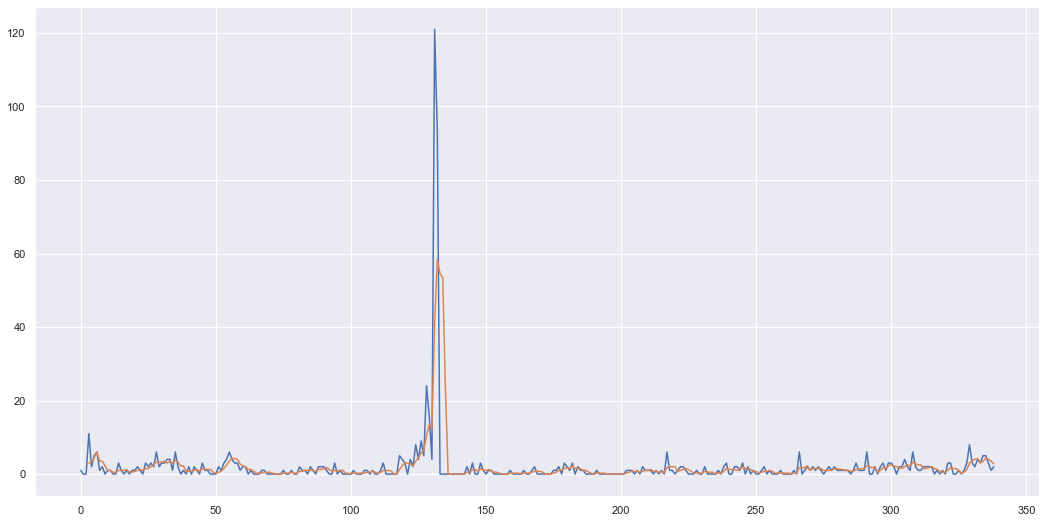

In [ ]:
plt.subplots(figsize=(18,9))
zakat_per_hari['jumlah'].plot()
zakat_per_hari['jumlah'].rolling(window=4).mean().plot()

Seasonality tertangkap ketika menggunakan SMA dengan rentang 2 hari

In [7]:
sum_zakat_per_hari = df_zakat.groupby(pd.Grouper(key='tanggal', freq='D'))['total_zakat'].sum().reset_index()
sum_zakat_per_hari

,tanggal,total_zakat
0,2021-01-01,6000000.0
1,2021-01-02,0.0
2,2021-01-03,0.0
3,2021-01-04,7127500.0
4,2021-01-05,650000.0
...,...,...
334,2021-12-01,1929000.0
335,2021-12-02,1845000.0
336,2021-12-03,963000.0
337,2021-12-04,100000.0


<AxesSubplot:xlabel='tanggal', ylabel='total_zakat'>

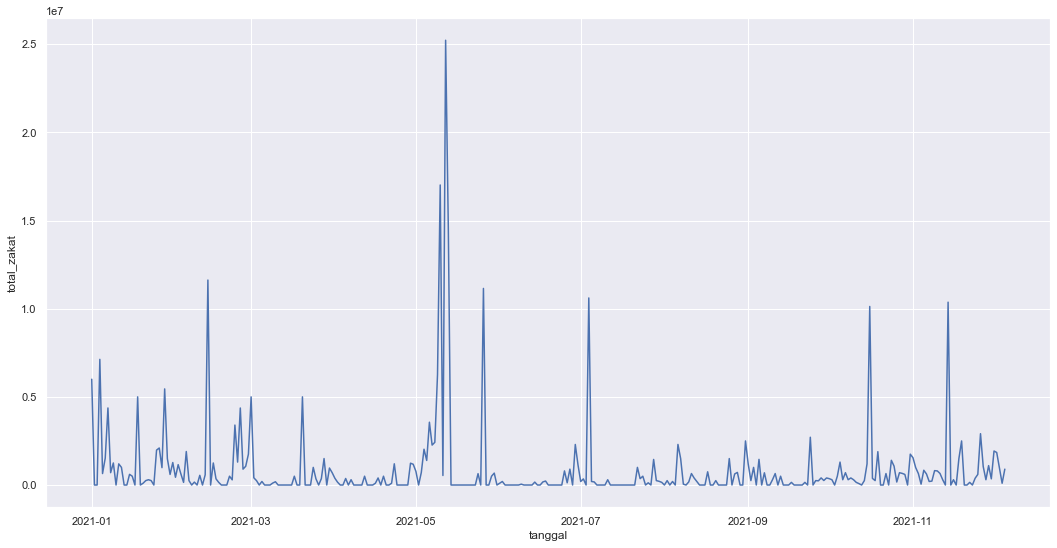

In [ ]:
plt.figure(figsize=(18,9))
sns.lineplot(data=sum_zakat_per_hari, x='tanggal',y='total_zakat')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:>

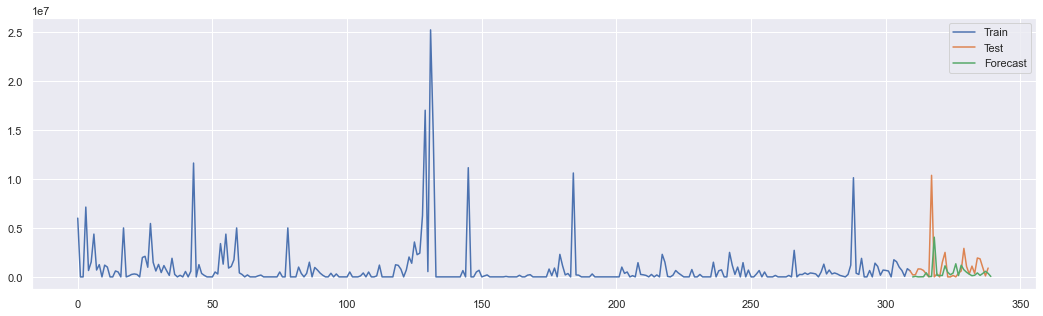

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train_data = sum_zakat_per_hari.iloc[:310]
test_data = sum_zakat_per_hari.iloc[309:]

fitted_model = ExponentialSmoothing(train_data['total_zakat'], trend='add', seasonal_periods=120, seasonal='add').fit()

predict = fitted_model.forecast(30)

plt.figure(figsize=(18,9))
train_data['total_zakat'].plot(legend=True, label = 'Train', figsize=(18,5))
test_data['total_zakat'].plot(legend=True, label = 'Test')
predict.plot(legend=True, label = "Forecast")

In [9]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np j
print("SARIMAX")
print("MAE: ",mean_absolute_error(test_data['total_zakat'],predict[:30]))
print("MSE: ",mean_squared_error(test_data['total_zakat'],predict[:30]))
print("RMSE: ", np.sqrt(mean_squared_error(test_data['total_zakat'],predict[:30])))
print("R2: ",r2_score(test_data['total_zakat'],predict[:30]))
print("")

SARIMAX
MAE:  810508.3292176754
MSE:  2071708089238.9875
RMSE:  1439342.9366342782
R2:  0.4195331847746877



120 -> 41%

In [39]:
#SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data['total_zakat'], seasonal_order=(1,1,1,120))
result = model.fit()

In [37]:
start = len(train_data)
end = len(train_data)+len(test_data)-1

predictions = result.predict(start, end,typ = 'levels').rename("SARIMA forecast")

<AxesSubplot:>

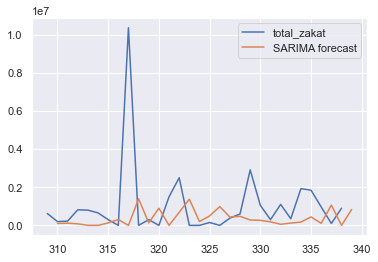

In [38]:
test_data['total_zakat'].plot(legend=True)
predictions.plot(legend = True)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np 

print("SARIMAX")
print("MAE: ",mean_absolute_error(test_data['total_zakat'],predictions))
print("MSE: ",mean_squared_error(test_data['total_zakat'],predictions))
print("RMSE: ", np.sqrt(mean_squared_error(test_data['total_zakat'],predictions)))
print("R2: ",r2_score(test_data['total_zakat'],predictions))
print("")

SARIMAX
MAE:  1018974.6260420616
MSE:  4176975701770.5493
RMSE:  2043765.0798882316
R2:  -0.170336591083595



In [55]:
#Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
df_ses = sum_zakat_per_hari.copy()

model_ses = SimpleExpSmoothing(sum_zakat_per_hari['total_zakat'])
fitted_model_ses = model_ses.fit(smoothing_level = 0.3, use_brute = True, optimized = False)
df_ses["alpa_0.3"] = fitted_model_ses.fittedvalues

fitted_model_ses = model_ses.fit(smoothing_level = 0.8, use_brute = True, optimized = False)
df_ses["alpa_0.8"] = fitted_model_ses.fittedvalues

In [58]:
df_ses

,tanggal,total_zakat,alpa_0.3,alpa_0.8
0,2021-01-01,6000000.0,6.000000e+06,6.000000e+06
1,2021-01-02,0.0,6.000000e+06,6.000000e+06
2,2021-01-03,0.0,4.200000e+06,1.200000e+06
3,2021-01-04,7127500.0,2.940000e+06,2.400000e+05
4,2021-01-05,650000.0,4.196250e+06,5.750000e+06
...,...,...,...,...
334,2021-12-01,1929000.0,7.770775e+05,4.762203e+05
335,2021-12-02,1845000.0,1.122654e+06,1.638444e+06
336,2021-12-03,963000.0,1.339358e+06,1.803689e+06
337,2021-12-04,100000.0,1.226451e+06,1.131138e+06


In [59]:
print("SARIMAX")
print("MAE: ",mean_absolute_error(sum_zakat_per_hari['total_zakat'],df_ses["alpa_0.8"]))
print("MSE: ",mean_squared_error(sum_zakat_per_hari['total_zakat'],df_ses["alpa_0.8"]))
print("RMSE: ", np.sqrt(mean_squared_error(sum_zakat_per_hari['total_zakat'],df_ses["alpa_0.8"])))
print("R2: ",r2_score(sum_zakat_per_hari['total_zakat'],df_ses["alpa_0.8"]))
print("")

SARIMAX
MAE:  1111563.6704388703
MSE:  7314489612019.109
RMSE:  2704531.31097037
R2:  -0.29258469340909765



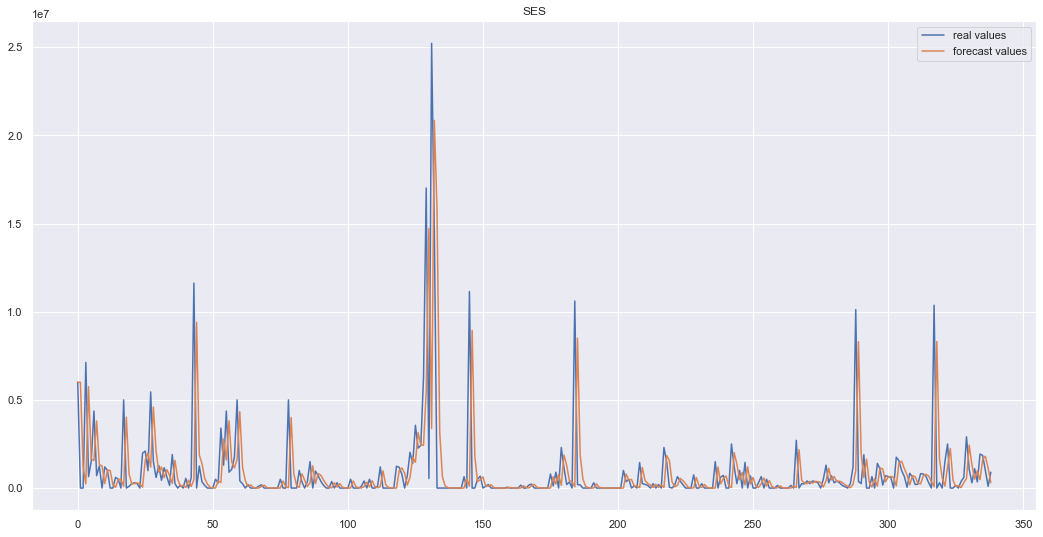

In [56]:
plt.figure(figsize=(18,9))
plt.plot(df_ses['total_zakat'],label='real values')
plt.plot(df_ses['alpa_0.8'],label='forecast values')
plt.title("SES") 
plt.legend()

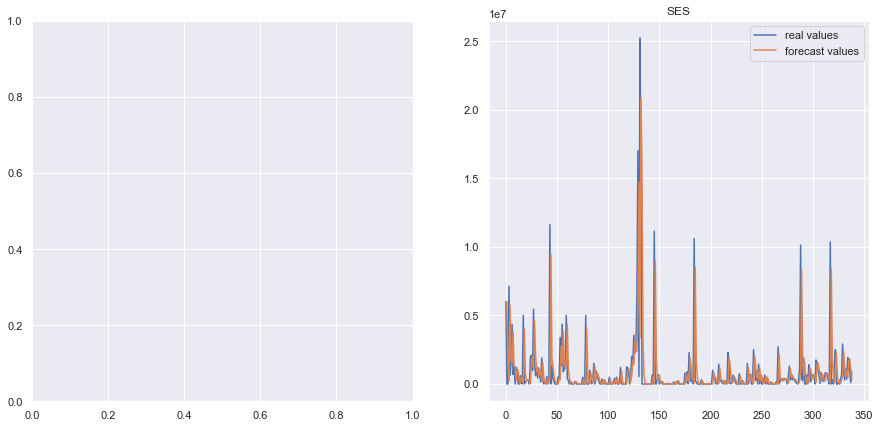

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(15,7)) 


# axs[0].plot(df_sma['Passengers'],label='real values')
# axs[0].plot(df_sma['4-month-SMA'],label='forecast values')
# axs[0].set_title("SMA") 
# axs[0].legend()


axs[1].plot(df_ses['total_zakat'],label='real values')
axs[1].plot(df_ses['alpa_0.8'],label='forecast values')
axs[1].set_title("SES") 
axs[1].legend()
